# Doubly constrained gravity model

For a given:
* set of origins $i$ and destinations $j$ 
* production at origins vector $O_i$
* attraction at destinations vector $D_j$
* distance (cost) matrix between origins and destinations $C_{ij}$
* cost function for the decay/gravity function $T_{ij}=exp(-\beta C_{ij})$

Compute:
* trip matrix $T_{ij}$ such that
* $\sum_{i \in O} T_{ij} = O_i \forall j \in O$
* $\sum_{j \in D} T_{ij} = D_i \forall i \in D $


In [87]:
%load_ext autoreload
%autoreload 2

In [73]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotmap import DotMap
import os
import math

In [115]:
from triply import *

In [119]:
X = pipe()

/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:46-CRITICAL-Outer ite: 0	 error:4244515.58	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:48-CRITICAL-Outer ite: 1	 error:75013.07	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:49-CRITICAL-Outer ite: 2	 error:2295.01	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:51-CRITICAL-Outer ite: 3	 error:142.19	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:52-CRITICAL-Outer ite: 4	 error:9.59	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:54-CRITICAL-Outer ite: 5	 error:0.67	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:55-CRITICAL-Outer ite: 6	 error:0.05	


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


11-03-22 13:53:57-CRITICAL-Converged Ite: 7	 error:0.01	


1 59477 59477.0
2 87185 87185.0
3 85565 85565.0


0.005098773422997307

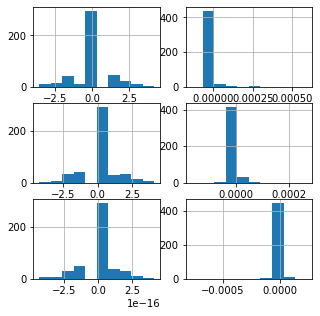

In [133]:
inData = read_wichita()
fig, ax = plt.subplots(3,2, figsize=(5,5))
ax = ax.flatten()
j=-1
for k in [1,2,3]:
    j+=1
    Xij_k = inData['full_xij_k{}'.format(k)]
    S = Xij_k.sum(axis=1)
    D = Xij_k.sum(axis=0)
    ((X[k].sum(1) - S) / S).hist(ax=ax[j]) 
    print(k, S.sum(),X[k].sum().sum())
    j+=1
    ((X[k].sum(0) - D) / S).hist(ax=ax[j]) 
((sum([X[k] for k in [1,2,3]])-inData.full_xij)**2).sum().sum()

<AxesSubplot:ylabel='Frequency'>

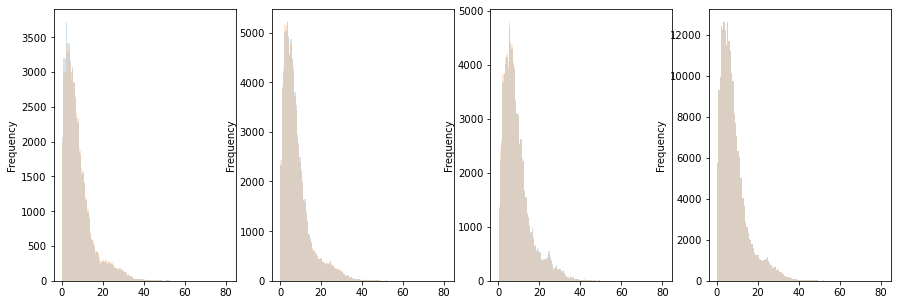

In [140]:
inData = read_wichita()
fig, ax = plt.subplots(1,4, figsize=(15,5))
ax = ax.flatten()
j=-1


for k in [1,2,3]:
    j+=1
    Xij_k = inData['full_xij_k{}'.format(k)]
    S = Xij_k.sum(axis=1)
    D = Xij_k.sum(axis=0)
    H = Xij_k.stack().to_frame()
    H.columns = ['flow']
    H['cost'] = inData.dist.stack()
    #H = H[H['cost']>10]
    H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[k-1], bins = 130, alpha = 0.2) # trip distance distribution
    H = X[k].stack().to_frame()
    H.columns = ['flow']
    H['cost'] = inData.dist.stack()
    #H = H[H['cost']>10]
    H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[k-1], bins = 130, alpha = 0.2) # trip distance distribution
Xij_k = inData['full_xij']
S = Xij_k.sum(axis=1)
D = Xij_k.sum(axis=0)
H = Xij_k.stack().to_frame()
H.columns = ['flow']
H['cost'] = inData.dist.stack()
#H = H[H['cost']>10]
H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[3], bins = 130, alpha = 0.2) # trip distance distribution
    
((sum([X[k] for k in [1,2,3]])-inData.full_xij)**2).sum().sum()
H = sum([X[k] for k in [1,2,3]]).stack().to_frame()
H.columns = ['flow']
H['cost'] = inData.dist.stack()
#H = H[H['cost']>10]
H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[3], bins = 130, alpha = 0.2) # trip distance distribution

In [122]:
X[1].sum()

0       23.999872
1      601.997911
2      225.999238
3       98.999397
4      494.997688
          ...    
459    100.001524
460      8.001053
461     52.006469
462    323.056711
463     72.032925
Length: 464, dtype: float64

Iteration: 0	 total: 85565.00	 error_O: 0.00	 error_D: 2099946.78
Iteration: 1	 total: 85565.00	 error_O: 0.00	 error_D: 303384.61
Iteration: 2	 total: 85565.00	 error_O: 0.00	 error_D: 185860.16
Iteration: 3	 total: 85565.00	 error_O: 0.00	 error_D: 113745.62
Iteration: 4	 total: 85565.00	 error_O: 0.00	 error_D: 67527.73
Iteration: 5	 total: 85565.00	 error_O: 0.00	 error_D: 39094.30
Iteration: 6	 total: 85565.00	 error_O: 0.00	 error_D: 22157.30
Iteration: 7	 total: 85565.00	 error_O: 0.00	 error_D: 12340.32
Iteration: 8	 total: 85565.00	 error_O: 0.00	 error_D: 6778.68
Iteration: 9	 total: 85565.00	 error_O: 0.00	 error_D: 3684.89
Iteration: 10	 total: 85565.00	 error_O: 0.00	 error_D: 1987.88
Iteration: 11	 total: 85565.00	 error_O: 0.00	 error_D: 1066.67
Iteration: 12	 total: 85565.00	 error_O: 0.00	 error_D: 570.31
Iteration: 13	 total: 85565.00	 error_O: 0.00	 error_D: 304.24
Iteration: 14	 total: 85565.00	 error_O: 0.00	 error_D: 162.09
Iteration: 15	 total: 85565.00	 error_O:

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,3.802546e+00,3.250965,2.149769,0.338357,61.969865,0.0,0.231296,0.559803,0.004850,1.134795,...,0.000039,5.367609e-09,6.658461e-08,1.270570e-06,0.000558,0.000420,5.415297e-07,0.000004,0.000019,5.960753e-10
1,3.731313e-04,20.119728,0.269310,0.023193,0.042485,0.0,1.004703,0.308689,0.006326,0.307340,...,0.000045,1.162469e-08,2.181586e-07,1.002633e-05,0.001813,0.001290,1.929752e-06,0.000013,0.000065,1.976565e-09
2,2.327749e-02,25.406693,23.299253,0.098708,2.072403,0.0,2.630053,0.881518,0.049799,13.742766,...,0.000321,5.175098e-08,7.503459e-07,1.515797e-05,0.006463,0.004795,6.250762e-06,0.000042,0.000218,6.557913e-09
3,4.992177e-03,2.981415,0.134500,18.855293,0.477636,0.0,0.105440,3.307774,0.000662,0.108707,...,0.000005,1.564910e-09,3.261980e-08,4.659517e-06,0.000238,0.000166,2.991197e-07,0.000002,0.000010,3.423430e-10
4,2.297874e-01,1.372564,0.709701,0.120041,25.620091,0.0,0.088449,0.254758,0.001358,0.390698,...,0.000009,1.406510e-09,1.990960e-08,4.991715e-07,0.000172,0.000127,1.663554e-07,0.000001,0.000006,1.745298e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,4.514161e-06,0.120632,0.004755,0.000121,0.000368,0.0,0.027078,0.001473,0.037524,0.005266,...,0.138230,1.142816e-04,1.989734e-03,8.074803e-03,9.956911,10.621662,1.642698e-02,0.109875,0.578262,1.733789e-05
460,5.847147e-07,0.018154,0.000623,0.000022,0.000048,0.0,0.003838,0.000243,0.004904,0.000694,...,0.116754,4.019105e-03,8.658706e-02,7.935233e-02,1.390156,1.652096,7.613360e-01,5.153793,26.881038,8.405394e-04
461,5.039569e-07,0.015184,0.000532,0.000018,0.000041,0.0,0.003229,0.000202,0.004252,0.000593,...,0.111434,4.159630e-03,9.042466e-02,6.557959e-02,1.187420,1.419652,6.621165e-01,4.993313,27.904496,8.366539e-04
462,3.037880e-07,0.008990,0.000319,0.000011,0.000025,0.0,0.001918,0.000119,0.002579,0.000354,...,0.075059,3.681297e-03,7.907180e-02,4.417256e-02,0.709370,0.853210,3.943665e-01,3.186550,22.300900,7.338097e-04


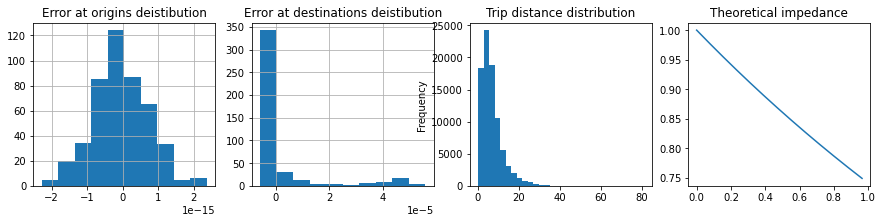

In [110]:
k = 3
X = inData['full_xij_k{}'.format(k)]
S = X.sum(axis=1)
D = X.sum(axis=0)
Q = inData.dist
doubly_constrained(S,D,Q, beta = 0.3)

let's import some network - nodes are zones of the network

,S,D,X,mean C
1,59477.0,59477.0,59477.0,8.042576
2,87185.0,87185.0,87185.0,8.101188
3,85565.0,85565.0,85565.0,9.292421


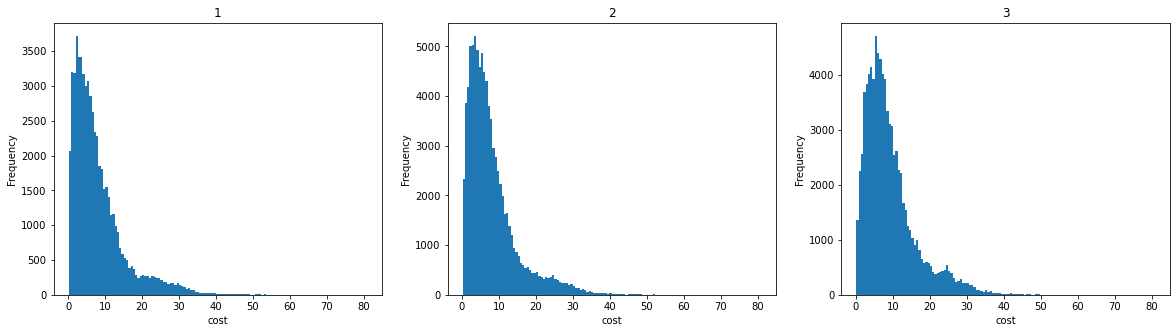

In [83]:
d = dict()
C = inData.dist
fig, ax = plt.subplots(1,3, figsize = (20,5))
for k in [1,2,3]:
    O = inData.oik[k-1]
    D = inData.djk[k-1]
    X = inData['full_xij_k{}'.format(k)]
    S = X.sum(axis=1)
    D = X.sum(axis=0)
    H = X.stack().to_frame()
    H.columns = ['flow']
    H['cost'] = C.stack()
    #H = H[H['cost']>10]
    H['cost'].plot(kind='hist', weights = H['flow'], ax = ax[k-1], bins = 130) # trip distance distribution
    ax[k-1].set_title(k)
    ax[k-1].set_xlabel('cost')
    
    d[k] = {"S":S.sum(), "D":D.sum(), "X":X.sum().sum(), 'mean C':(C*X).sum().sum()/X.sum().sum()}
df = pd.DataFrame(d).T
df  

In [ ]:
for k in [1,2,3]:
    X = inData['full_xij_k{}'.format(k)]
    S = X.sum(axis=1)
    D = X.sum(axis=0)
    

Iteration: 0	 total: 89235.00	 error_O: 0.00	 error_D: 4586719.63
Iteration: 1	 total: 89235.00	 error_O: 0.00	 error_D: 87529.93
Iteration: 2	 total: 89235.00	 error_O: 0.00	 error_D: 2421.70
Iteration: 3	 total: 89235.00	 error_O: 0.00	 error_D: 78.05
Iteration: 4	 total: 89235.00	 error_O: 0.00	 error_D: 2.86
Iteration: 5	 total: 89235.00	 error_O: 0.00	 error_D: 0.12
Ite: 6	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 9.41	 var: 14.15


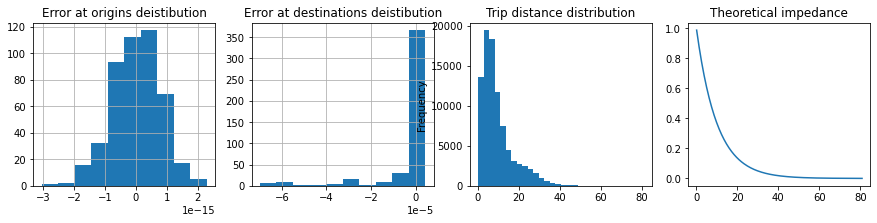

In [86]:
d = dict()
C = inData.dist
for k in [1,2,3]:
    O = inData.oik[k-1]
    D = inData.djk[k-1]
    X = inData['full_xij_k{}'.format(k)]
    
    d[k] = {"O":O.sum(), "D":D.sum(), "X":X.sum().sum(), 'mean C':(C*X).sum().sum()/X.sum().sum()}
pd.DataFrame(d).T


def doubly_constrained(O, D, C, X = None, beta = 0.1, plot = True, max_ite = 10000, eps = 0.01, normalize = True):
    """
    Computes trip matrix
    O - pandas series of origin flow from each zone
    D - pandas series of destination flows towards each zone
    C - cost matrix (distance) between the zones (pd.DataFrame)
    X - 
    beta - parameter in the gravity model (enters with negative sign into the model)
    plot - flag to print iterations and plot results on the graphs
    max_ite - maximal number of iterations
    eps - error (Total Squared error) at which balancing terminates
    """
    if normalize: # and abs(O.sum() - D.sum()) / D.sum() > eps: # see if sums match
        D = D*(O.sum()/D.sum()) # adjust D to O
        
    def fun(x):
        return np.exp(-beta*x)
    O = O.values # rows
    A = np.ones_like(O)
    D = D.values # columns
    B = np.ones_like(D)
    F = C.apply(np.vectorize(fun))
    for i in range(max_ite):
        T = np.outer(O*A,D*B)*F
        A = np.reciprocal((B*D*F).sum(1))
        T = np.outer(O*A,D*B)*F       
        B = np.reciprocal((A*O*(F.T)).sum(1))
        if max(((T.sum(1)-O)**2).sum(),((T.sum(0)-D)**2).sum()) < eps:
            break
        if plot and i % 1 ==0:
            print("Iteration: {}\t total: {:.2f}\t error_O: {:.2f}\t error_D: {:.2f}".format(i,
                                                                             T.sum().sum(),
                                                                             ((T.sum(1)-O)**2).sum(),
                                                                             ((T.sum(0)-D)**2).sum()))
            
    H = T.stack().to_frame()
    H.columns = ['flow']
    H['cost'] = C.stack()
    mean_cost = (H.cost*H.flow).sum()/H.flow.sum()
    cost_var = (H.cost*H.flow).std()
    print("Ite: {}\t demand:{:.2f}\t trips: {:.2f}\t error_O: {:.2f}\t error_D: {:.2f} cost mean: {:.2f}\t var: {:.2f}".format(i,
                                                                                                                               O.sum(),
                                                                                                                               T.sum().sum(),
                                                                                                                               ((T.sum(1)-O)**2).sum(),
                                                                                                                               ((T.sum(0)-D)**2).sum(),
                                                                                                                               mean_cost, cost_var))
    if plot:
        fig, axes = plt.subplots(1,4,figsize = (15,3))
        axes = axes.flatten()
        #productions
        ((T.sum(1)-O)/O).hist(ax=axes[0]) # error at origins
        axes[0].set_title('Error at origins deistibution')
        ((T.sum(0)-D)/D).hist(ax=axes[1]) # error at destinations
        axes[1].set_title('Error at destinations deistibution')
        H['cost'].plot(kind='hist', weights = H['flow'], ax = axes[2], bins = 30) # trip distance distribution
        axes[2].set_title('Trip distance distribution')
        
        
        x=np.linspace(C.min().min(),C.max().max(), 200)
        axes[3].plot(x,fun(x))
        axes[3].set_title('Theoretical impedance')

    return T
T = doubly_constrained(O, D, C, beta = 0.1, plot = True, normalize = True)

Ite: 0	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.00 cost mean: 12.32	 var: 18.14


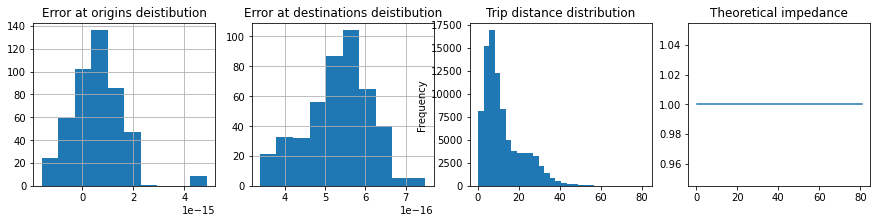

In [68]:
T = doubly_constrained(O, D, C, beta = 0, plot = True, normalize = True)

Iteration: 0	 total: 89235.00	 error_O: 0.00	 error_D: 20.09
Ite: 1	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.00 cost mean: 12.32	 var: 18.14


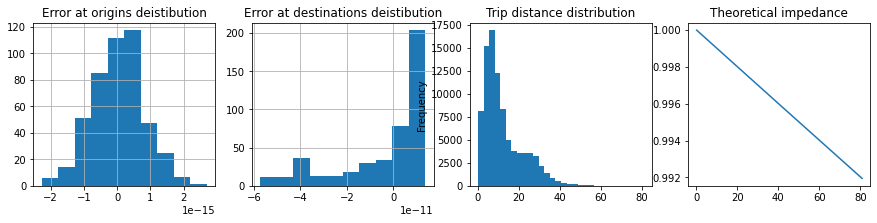

In [69]:
T = doubly_constrained(O, D, C, beta = 0.0001, plot = True, normalize = True)

In [70]:
for beta in [20, 10,1,0.5,0.1, 0.01, 0.001, 0]:
    print(beta)
    T = doubly_constrained(O, D, C, beta = beta, plot = False, normalize = True)

20


/opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/numpy/core/numeric.py:936: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


Ite: 4474	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 2.41	 var: 29.04
10
Ite: 2417	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 2.42	 var: 27.65
1
Ite: 197	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 3.16	 var: 18.96
0.5
Ite: 85	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 4.24	 var: 16.25
0.1
Ite: 6	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.01 cost mean: 9.41	 var: 14.15
0.01
Ite: 2	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.00 cost mean: 12.14	 var: 17.73
0.001
Ite: 1	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.00 cost mean: 12.31	 var: 18.10
0
Ite: 0	 demand:89235.00	 trips: 89235.00	 error_O: 0.00	 error_D: 0.00 cost mean: 12.32	 var: 18.14


In [71]:
T.round(2)

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,0.90,0.02,0.03,0.16,0.16,2.29,0.31,0.04,0.49,0.19,...,0.01,0.03,0.10,0.02,0.16,0.03,0.06,0.15,0.02,0.13
1,0.32,0.01,0.01,0.06,0.06,0.82,0.11,0.02,0.18,0.07,...,0.00,0.01,0.04,0.01,0.06,0.01,0.02,0.05,0.01,0.05
2,0.40,0.01,0.01,0.07,0.07,1.03,0.14,0.02,0.22,0.09,...,0.00,0.01,0.05,0.01,0.07,0.01,0.03,0.07,0.01,0.06
3,0.64,0.02,0.02,0.12,0.12,1.64,0.22,0.03,0.35,0.14,...,0.01,0.02,0.08,0.02,0.12,0.02,0.04,0.11,0.01,0.09
4,0.60,0.02,0.02,0.11,0.11,1.53,0.21,0.03,0.33,0.13,...,0.01,0.02,0.07,0.02,0.11,0.02,0.04,0.10,0.01,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0.28,0.01,0.01,0.05,0.05,0.71,0.10,0.01,0.15,0.06,...,0.00,0.01,0.03,0.01,0.05,0.01,0.02,0.05,0.01,0.04
460,0.32,0.01,0.01,0.06,0.06,0.82,0.11,0.02,0.18,0.07,...,0.00,0.01,0.04,0.01,0.06,0.01,0.02,0.05,0.01,0.05
461,0.36,0.01,0.01,0.06,0.07,0.92,0.12,0.02,0.20,0.08,...,0.00,0.01,0.04,0.01,0.07,0.01,0.02,0.06,0.01,0.05
462,0.44,0.01,0.01,0.08,0.08,1.13,0.15,0.02,0.24,0.10,...,0.00,0.01,0.05,0.01,0.08,0.01,0.03,0.07,0.01,0.06


----
(c) Rafal Kucharski, 2022